In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [02:43<00:00, 183.08image/s]


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    train_subset.dataset.data[idx] = (new_input, label)



  0%|          | 0/21000 [00:00<?, ?it/s]

100%|██████████| 21000/21000 [06:52<00:00, 50.95it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [9]:
saved_models = []

# for filters, num_layers in combinations:
#     print("--------------------------------------------------------")
#     print(f"Testing with \"{filters} filters\" and \"{num_layers} layers\"")
#     model = models.HandDetectionModel(filters, num_layers)
#     model.train_model(train, test, epochs=100, early_stopping_patience=10)
#     torch.save(model.state_dict(), f"models/model_{filters}_{num_layers}_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
#     saved_models.append(model)

model = models.PointLabellingModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [03:41<00:00,  1.48it/s]


Loss: 0.1148, Mean Absolute Error: 0.08657190294817407, Time remaining: 3:18:38.004077


Epoch 2/50 (Training): 100%|██████████| 329/329 [03:58<00:00,  1.38it/s]


Loss: 0.0776, Mean Absolute Error: 0.07130862516846428, Time remaining: 3:21:49.641888


Epoch 3/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0630, Mean Absolute Error: 0.06316969628901557, Time remaining: 3:21:21.100101


Epoch 4/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0538, Mean Absolute Error: 0.060878907627564795, Time remaining: 3:18:51.297978


Epoch 5/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0475, Mean Absolute Error: 0.058914554047774764, Time remaining: 3:15:40.047705


Epoch 6/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0427, Mean Absolute Error: 0.05655118200848711, Time remaining: 3:12:22.985388


Epoch 7/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0389, Mean Absolute Error: 0.055271575821841015, Time remaining: 3:08:31.032051


Epoch 8/50 (Training): 100%|██████████| 329/329 [04:06<00:00,  1.34it/s]


Loss: 0.0359, Mean Absolute Error: 0.05451291040616467, Time remaining: 3:05:01.293336


Epoch 9/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0333, Mean Absolute Error: 0.053993787517414446, Time remaining: 3:01:20.480452


Epoch 10/50 (Training): 100%|██████████| 329/329 [04:34<00:00,  1.20it/s]


Loss: 0.0315, Mean Absolute Error: 0.05441415535801269, Time remaining: 2:58:57.549440


Epoch 11/50 (Training): 100%|██████████| 329/329 [04:06<00:00,  1.34it/s]


Loss: 0.0295, Mean Absolute Error: 0.05211530069008152, Time remaining: 2:54:42.159285


Epoch 12/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0276, Mean Absolute Error: 0.05234688912775922, Time remaining: 2:50:15.570172


Epoch 13/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0265, Mean Absolute Error: 0.05224256514710315, Time remaining: 2:46:00.291331


Epoch 14/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0254, Mean Absolute Error: 0.05238966861779385, Time remaining: 2:41:24.332748


Epoch 15/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0242, Mean Absolute Error: 0.050647949780079915, Time remaining: 2:36:54.074670


Epoch 16/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0234, Mean Absolute Error: 0.04959447549140834, Time remaining: 2:32:17.223784


Epoch 17/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0225, Mean Absolute Error: 0.04958312833642072, Time remaining: 2:27:46.085349


Epoch 18/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0219, Mean Absolute Error: 0.04927386527762134, Time remaining: 2:23:11.027808


Epoch 19/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.34it/s]


Loss: 0.0215, Mean Absolute Error: 0.04911657472319426, Time remaining: 2:18:36.921924


Epoch 20/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0208, Mean Absolute Error: 0.04976920474399912, Time remaining: 2:14:04.565850


Epoch 21/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0203, Mean Absolute Error: 0.04864303123681469, Time remaining: 2:09:39.652781


Epoch 22/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.34it/s]


Loss: 0.0198, Mean Absolute Error: 0.04880087741432672, Time remaining: 2:05:17.820072


Epoch 23/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0196, Mean Absolute Error: 0.04726354300262446, Time remaining: 2:00:45.720135


Epoch 24/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0189, Mean Absolute Error: 0.046932342323534035, Time remaining: 1:56:20.294334


Epoch 25/50 (Training): 100%|██████████| 329/329 [04:06<00:00,  1.34it/s]


Loss: 0.0186, Mean Absolute Error: 0.0478840459613724, Time remaining: 1:51:51.007200


Epoch 26/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0184, Mean Absolute Error: 0.04675642032414041, Time remaining: 1:47:20.800632


Epoch 27/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0179, Mean Absolute Error: 0.04692952112948641, Time remaining: 1:42:50.125130


Epoch 28/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0178, Mean Absolute Error: 0.04678484906462279, Time remaining: 1:38:23.613452


Epoch 29/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0175, Mean Absolute Error: 0.04632441430015767, Time remaining: 1:33:53.342043


Epoch 30/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0172, Mean Absolute Error: 0.046623566227548936, Time remaining: 1:29:29.355660


Epoch 31/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0172, Mean Absolute Error: 0.046156568452715874, Time remaining: 1:25:01.059884


Epoch 32/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0168, Mean Absolute Error: 0.046609377349786305, Time remaining: 1:20:32.150940


Epoch 33/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0166, Mean Absolute Error: 0.04564668943590306, Time remaining: 1:16:06.233728


Epoch 34/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0163, Mean Absolute Error: 0.04545723417020859, Time remaining: 1:11:40.099328


Epoch 35/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0160, Mean Absolute Error: 0.04539837535629247, Time remaining: 1:07:10.918305


Epoch 36/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.34it/s]


Loss: 0.0159, Mean Absolute Error: 0.045560343577427435, Time remaining: 1:02:43.309340


Epoch 37/50 (Training): 100%|██████████| 329/329 [04:01<00:00,  1.36it/s]


Loss: 0.0158, Mean Absolute Error: 0.045701510827750605, Time remaining: 0:58:12.719919


Epoch 38/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0159, Mean Absolute Error: 0.04514272966759002, Time remaining: 0:53:43.337640


Epoch 39/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0158, Mean Absolute Error: 0.04512374606379803, Time remaining: 0:49:15.834552


Epoch 40/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0153, Mean Absolute Error: 0.04524859734513658, Time remaining: 0:44:46.591110


Epoch 41/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.34it/s]


Loss: 0.0151, Mean Absolute Error: 0.04505830285872551, Time remaining: 0:40:17.213493


Epoch 42/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0151, Mean Absolute Error: 0.04430415236609096, Time remaining: 0:35:48.387400


Epoch 43/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0151, Mean Absolute Error: 0.04459963273257017, Time remaining: 0:31:19.893988


Epoch 44/50 (Training): 100%|██████████| 329/329 [04:02<00:00,  1.36it/s]


Loss: 0.0148, Mean Absolute Error: 0.044445813078671056, Time remaining: 0:26:51.375654


Epoch 45/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.34it/s]


Loss: 0.0147, Mean Absolute Error: 0.0447081181894433, Time remaining: 0:22:22.971005


Epoch 46/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0146, Mean Absolute Error: 0.04428697880753811, Time remaining: 0:17:54.758932


Epoch 47/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0145, Mean Absolute Error: 0.04389943620388178, Time remaining: 0:13:25.830936


Epoch 48/50 (Training): 100%|██████████| 329/329 [04:05<00:00,  1.34it/s]


Loss: 0.0152, Mean Absolute Error: 0.04421733359390117, Time remaining: 0:08:57.266714


Epoch 49/50 (Training): 100%|██████████| 329/329 [04:04<00:00,  1.35it/s]


Loss: 0.0146, Mean Absolute Error: 0.04393378569883235, Time remaining: 0:04:28.705867


Epoch 50/50 (Training): 100%|██████████| 329/329 [04:03<00:00,  1.35it/s]


Loss: 0.0144, Mean Absolute Error: 0.043996399109984964, Time remaining: 0:00:00


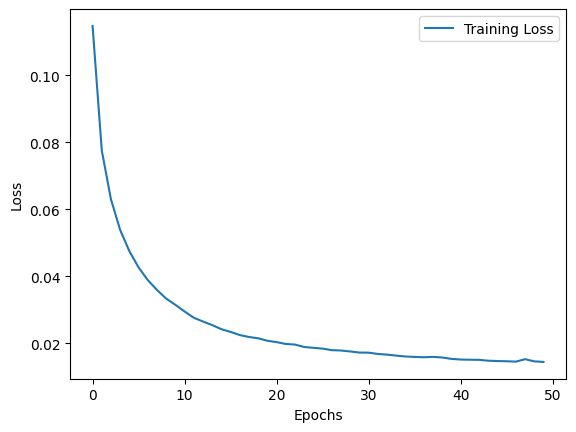

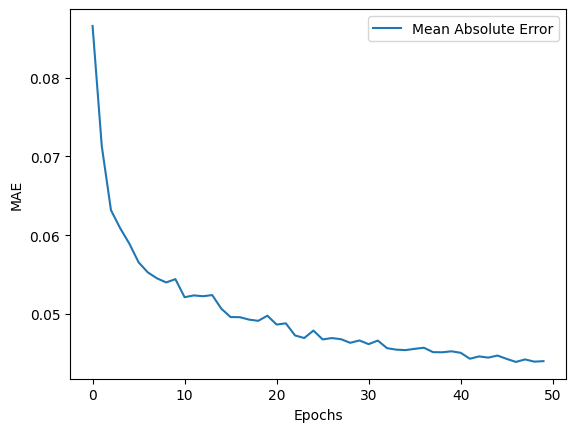

In [10]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:18<00:00,  5.11it/s]


[0.1521373987197876, 0.039855338633060455, 0.1361982375383377, 0.05932287871837616, 0.031018458306789398, 0.06613520532846451, 0.04549044743180275, 0.13081231713294983, 0.036722827702760696, 0.0172804556787014, 0.05410251393914223, 0.043596986681222916, 0.028356077149510384, 0.028252720832824707, 0.03582216799259186, 0.12186021357774734, 0.15106287598609924, 0.023748746141791344, 0.015207376331090927, 0.07099616527557373, 0.021376078948378563, 0.06844113767147064, 0.0878121554851532, 0.14308489859104156, 0.056116823107004166, 0.03684498369693756, 0.02021060511469841, 0.12060190737247467, 0.050639741122722626, 0.025447741150856018, 0.06884881854057312, 0.019719362258911133, 0.039264239370822906, 0.038064535707235336, 0.025123830884695053, 0.05276067182421684, 0.06673631072044373, 0.03613334894180298, 0.030495082959532738, 0.05791942775249481, 0.05977058783173561, 0.04922141507267952, 0.039858728647232056, 0.1086997389793396, 0.06755181401968002, 0.06165759265422821, 0.08604838699102402,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


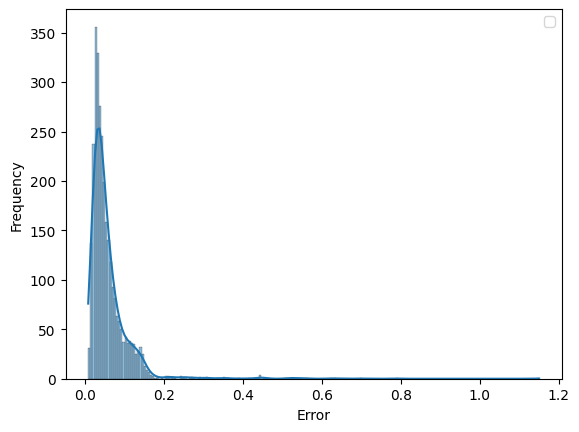

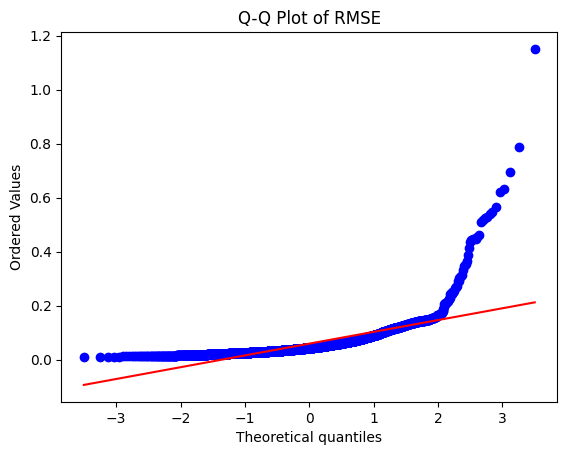

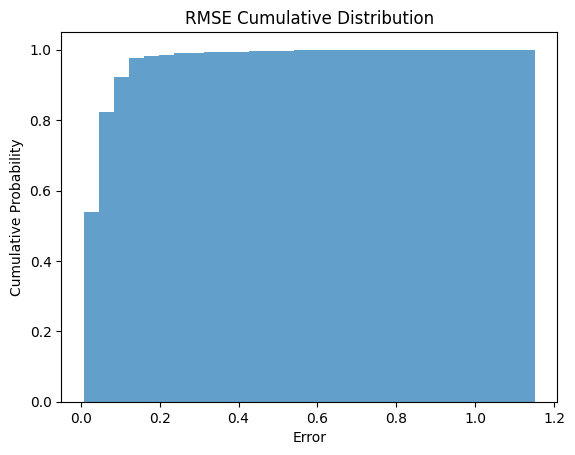

(3000, 21, 3)


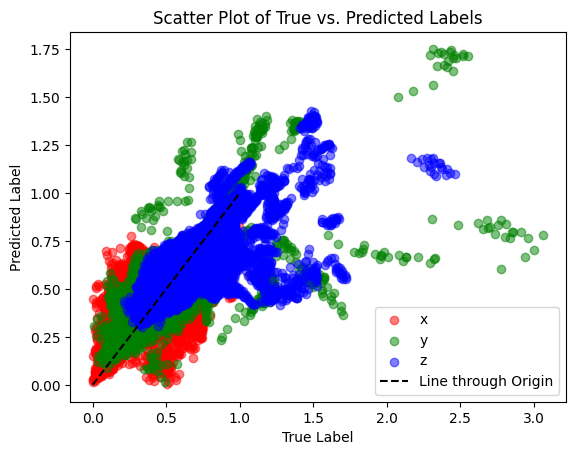

In [11]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [12]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

0.39368847012519836
0.37016361951828003
0.39543774724006653
0.44162529706954956
0.5062867999076843
0.5768581628799438
0.601839005947113
0.5465830564498901
0.4719316363334656
0.6371352076530457
0.617785632610321
0.5361872911453247
0.43770068883895874
0.6403771042823792
0.6087860465049744
0.5154169797897339
0.40361252427101135
0.6174766421318054
0.5858069658279419
0.5286678075790405
0.4429718554019928


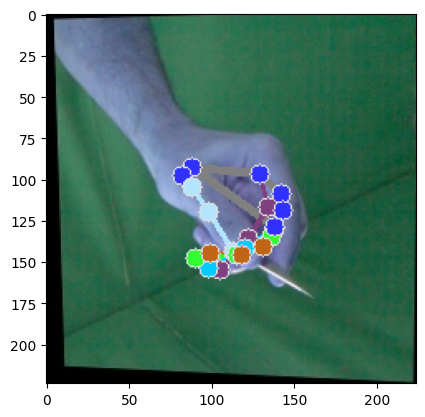

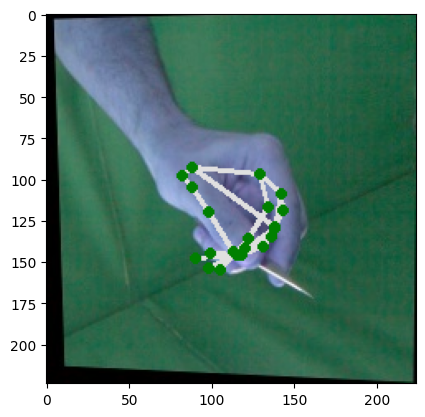

In [15]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00000999.jpg"
image = Image.open(file)

model = models.PointLabellingModel().to(device)


model.load_state_dict(torch.load("models/points_20231228-024753.pt"))
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))



mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
mp_drawing.draw_landmarks(
            img,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

# mp_drawing.plot_landmarks(
#                     hand_landmarks,
#                     mp_hands.HAND_CONNECTIONS)
# plt.imshow(cv2.imread(file))